In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
data = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
data.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [4]:
data.output.unique()

array([1, 0])

In [5]:
data.output.sum()

165

<AxesSubplot:xlabel='output', ylabel='Count'>

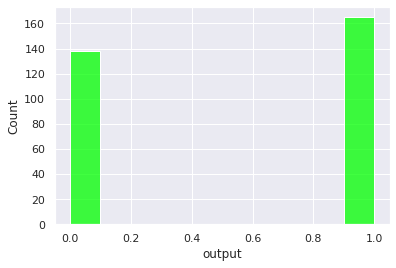

In [6]:
sns.histplot(x=data.output, color = "lime")

##### General One Person Data 

In [7]:
print(len(data.iloc[2,:]),data.shape)
data.iloc[2,:]

14 (303, 14)


age          41.0
sex           0.0
cp            1.0
trtbps      130.0
chol        204.0
fbs           0.0
restecg       0.0
thalachh    172.0
exng          0.0
oldpeak       1.4
slp           2.0
caa           0.0
thall         2.0
output        1.0
Name: 2, dtype: float64

#### Total 303 people went to Diagnosis

# Encoding

In [8]:
for i in data.cp.unique():
    
    a = data.cp == i
    data["cp_" + str(i)]  = a*1
    
data = data.drop("cp", axis = 1)

In [9]:
for i in data.restecg.unique():
    
    a = data.restecg == i
    data["restecg_" + str(i)]  = a*1
    
data = data.drop("restecg", axis = 1)

In [10]:
Y = data.output
X = data.drop("output", axis =1)
X.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,slp,caa,thall,cp_3,cp_2,cp_1,cp_0,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,2,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,2,0,0,1,0,1,0,0
3,56,1,120,236,0,178,0,0.8,2,0,2,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,2,0,0,0,1,0,1,0


# Heat map

<AxesSubplot:>

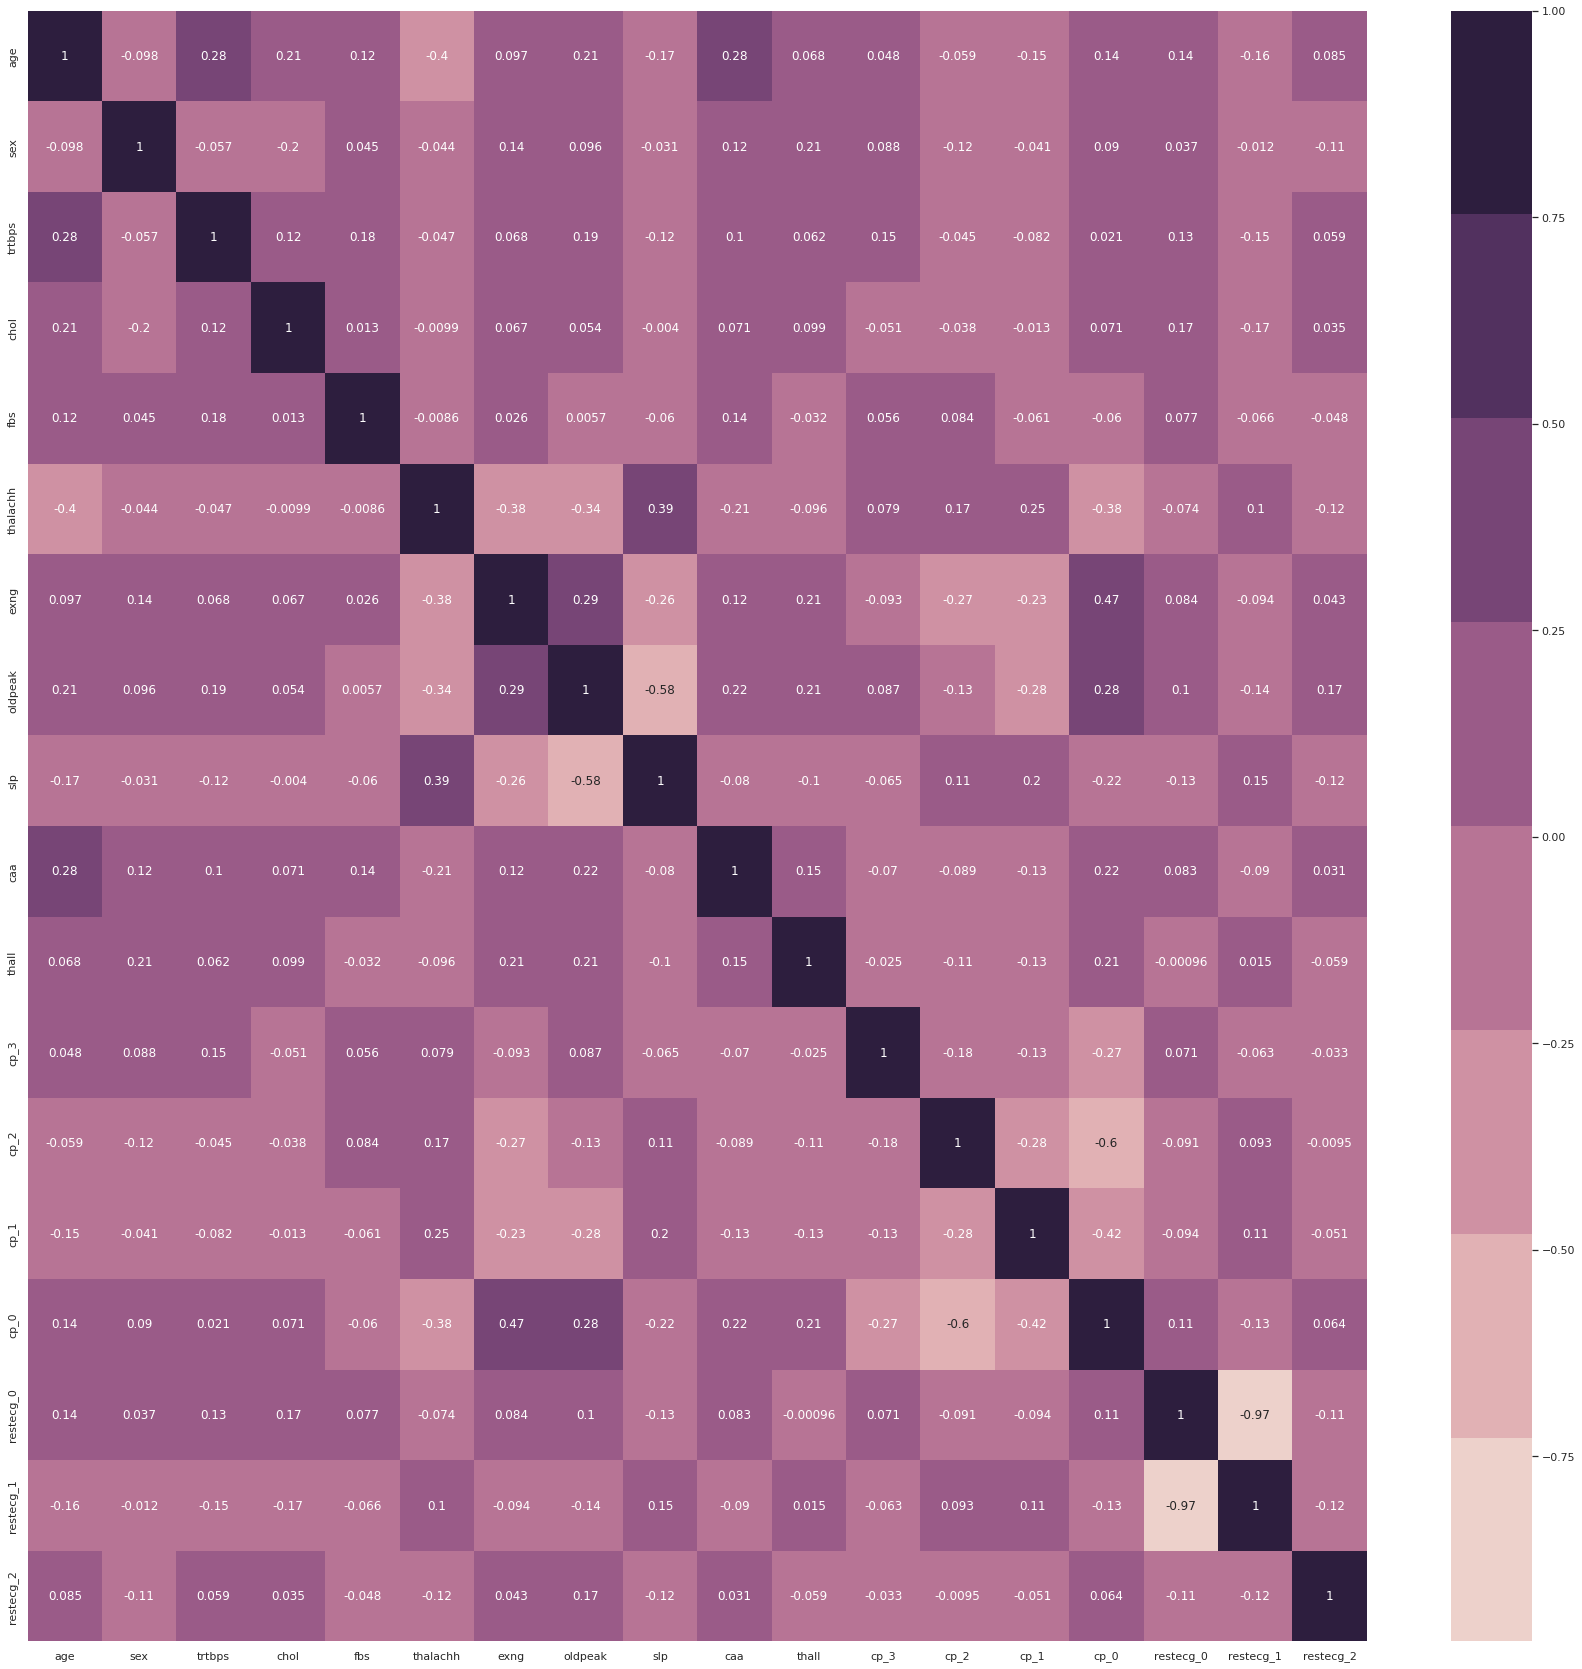

In [11]:
plt.figure(figsize = (30,30))
sns.heatmap(X.corr(), cmap = sns.cubehelix_palette(8),annot = True)

#### (restecg_0 , restecg_1) are in high corrilation. Remobin restecg_1

<AxesSubplot:>

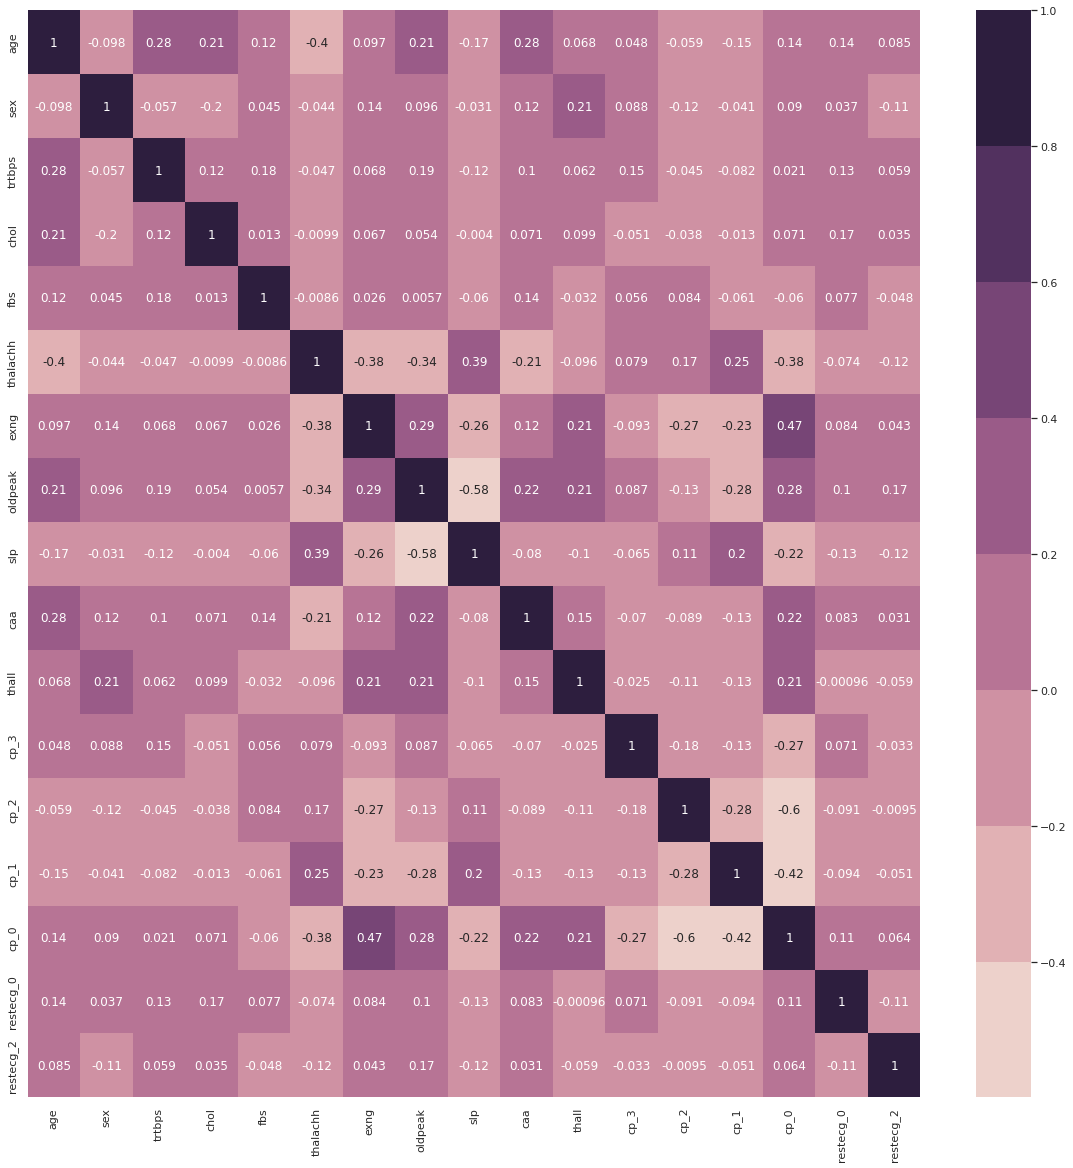

In [12]:
X = X.drop(['restecg_1'], axis = 1)

plt.figure(figsize = (20,20))
sns.heatmap(X.corr(), cmap = sns.cubehelix_palette(8),annot = True)

In [13]:
xx = X
xx["output"] = Y

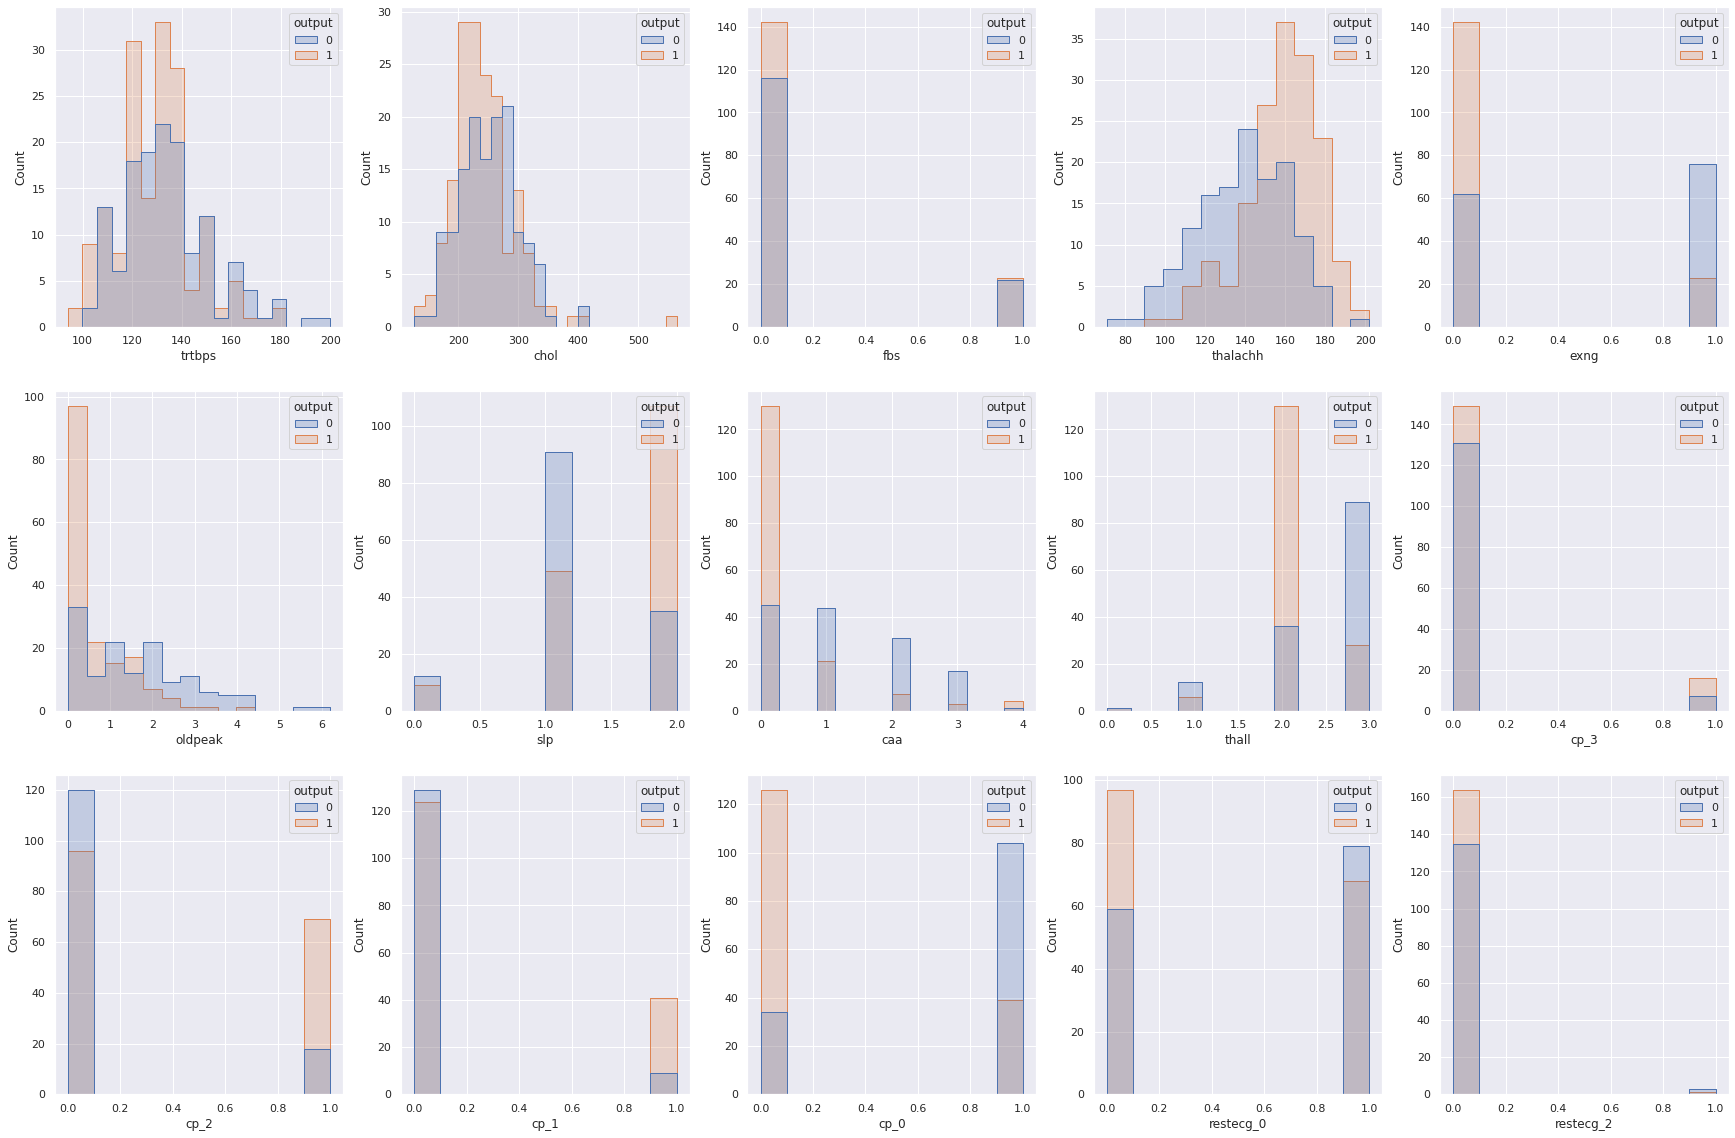

In [14]:
fig, ax = plt.subplots(nrows = 3, ncols = 5, figsize = (30,20))
a = 2
for i in range(3):
    for j in range(5):
        sns.histplot(data, x=xx.columns[a], element = "step", ax = ax[i,j], hue = "output" )
        a = a+1

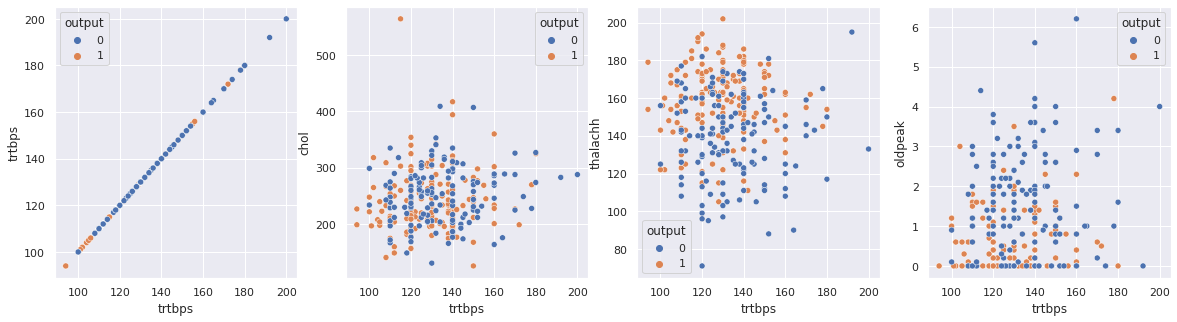

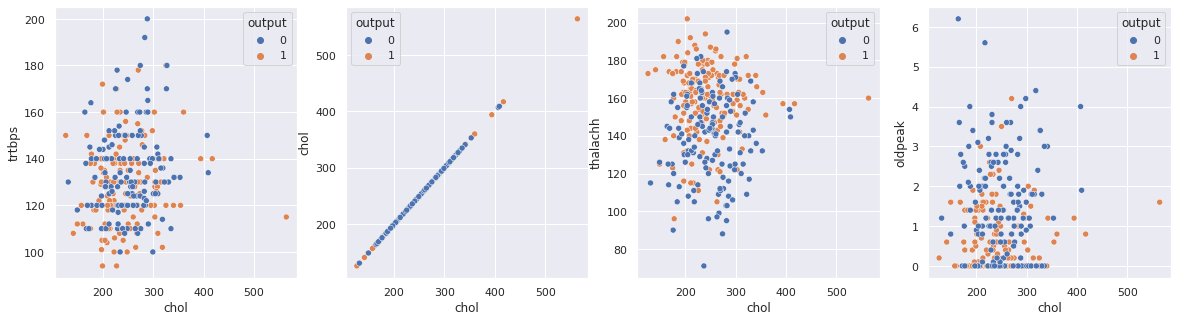

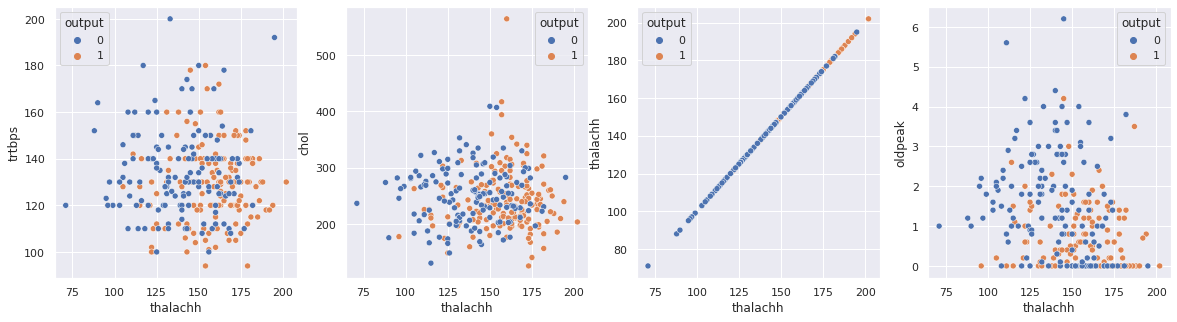

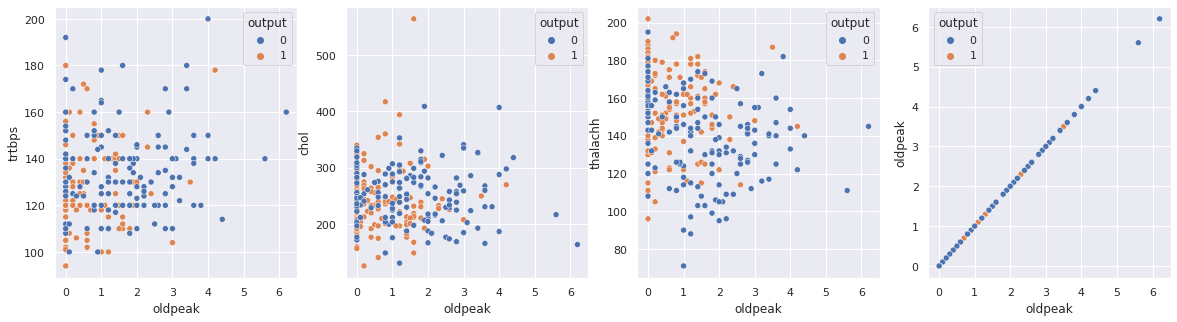

In [15]:
cols = ['trtbps', 'chol', 'thalachh', 'oldpeak']
for j in range(4):
    fig, ax = plt.subplots(ncols = 4, figsize = (20,5))
    for i in range(4):
        sns.scatterplot(x=xx[cols[j]], y=xx[cols[i]], data=data, hue='output', ax = ax[i])

#### There are certainly some patterns to recognize Heart Attack chance is high or low, based on the above 2 plots.

#### Based on above plots we can expect One of Desition tree models will give one of the good results 

# Splitting Data into Train and Test data

In [16]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, Y_train, Y_test = tts(X, Y, random_state = 1, test_size = 0.33)

# Scaling 

In [17]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit_transform(X_train)
scalar.transform(X_test)

array([[ 0.87552294, -1.58113883,  1.65060761, ...,  1.06622798,
        -0.09975093, -1.09841783],
       [ 0.22568324,  0.63245553, -0.04482169, ...,  1.06622798,
        -0.09975093,  0.91040037],
       [-0.64076968,  0.63245553, -0.04482169, ...,  1.06622798,
        -0.09975093, -1.09841783],
       ...,
       [ 1.3087494 ,  0.63245553, -1.06207928, ...,  1.06622798,
        -0.09975093, -1.09841783],
       [ 1.63366925, -1.58113883,  0.52032141, ..., -0.93788572,
        -0.09975093,  0.91040037],
       [ 0.44229647, -1.58113883,  1.08546451, ...,  1.06622798,
        -0.09975093,  0.91040037]])

# Error Setting

In [18]:
from sklearn.metrics import mean_absolute_error as mae

# Linear Model

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
pred = lr.predict(X_test)

In [20]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

0.0

#### I am having a doubt, checking the pred value 

In [21]:
print(len(Y_test))
print(Y_test.tolist())

100
[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1]


In [22]:
print(len(pred))
print(pred)

100
[0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1]


# SVM Model 1

In [23]:
from sklearn.svm import LinearSVC
svc1 = LinearSVC(random_state =2)
svc1.fit(X_train,Y_train)
pred = svc1.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [24]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

13.0

# SVM model 2

In [25]:
from sklearn.svm import SVC
svc2 = SVC(kernel = "rbf", random_state = 2)
svc2.fit(X_train,Y_train)
pred = svc2.predict(X_test)

In [26]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

39.0

# Naive Bayes Model

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
pred = gnb.predict(X_test)

In [28]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

0.0

# Decision Tree Model 1

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(random_state = 2)
dtc1.fit(X_train,Y_train)
pred = dtc1.predict(X_test)

In [30]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

0.0

# Decision Tree Model 2

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc2 = DecisionTreeClassifier(random_state = 2,criterion = "entropy")
dtc2.fit(X_train,Y_train)
pred = dtc2.predict(X_test)

In [32]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

0.0

# Random Forest Model 1

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(random_state = 2, n_estimators = 10, criterion = "gini")
rfc1.fit(X_train,Y_train)
pred = rfc1.predict(X_test)

In [34]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

0.0

# Random Forest Model 2

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(random_state = 2, n_estimators = 10, criterion = "entropy")
rfc2.fit(X_train,Y_train)
pred = rfc2.predict(X_test)

In [36]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

2.0

# Random Forest Model 3

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc3 = RandomForestClassifier(random_state = 2, n_estimators = 400, criterion = "entropy")
rfc3.fit(X_train,Y_train)
pred = rfc3.predict(X_test)

In [38]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

0.0

# KNN Model 1

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(p = 2, n_neighbors = 5)
knn1.fit(X_train,Y_train)
pred = knn1.predict(X_test)

In [40]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

41.0

# KNN Model 2

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(p = 2, n_neighbors = 15)
knn2.fit(X_train,Y_train)
pred = knn2.predict(X_test)

In [42]:
pred = [int(round(i,0)) for i in pred]
mae(Y_test,pred) * 100

35.0

### The best prediction accuracy was obtainded by LinearRegression model, Naive Bayes model, Decition Tree models 

##### The accuracy best model on Test set of containg 33% of total data is 100%. 